# Análise Preditiva com Técnicas de Ensemble para Regressão

**Contexto:**  
Você foi contratado por uma empresa para construir um modelo preditivo capaz de estimar um valor a partir de um conjunto de 30 features. Embora existam modelos tradicionais que oferecem bons resultados, a empresa deseja:

- Melhorar a precisão das previsões.
- Obter um modelo robusto para diferentes cenários e padrões.

**Missão:**  
Projetar, desenvolver e avaliar técnicas de ensemble para regressão, analisando tanto a performance final quanto o comportamento dos modelos ao longo do processamento.

## Carregamento das bibliotecas necessárias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

sns.set(style="whitegrid")

### Load do dataset

In [2]:
df = pd.read_csv('dataset_regressao_etiquetado.csv', skiprows=1)

## Amostragem inicial dos dados

In [3]:
# Exibindo informações iniciais
print("Dimensão do dataset:", df.shape)
print("Visualização das primeiras linhas:")
print(df.head())

Dimensão do dataset: (1000000, 31)
Visualização das primeiras linhas:
         f0        f1        f2        f3        f4        f5        f6  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1 -0.463418 -0.465730  0.241962 -1.913280 -1.724918 -0.562288 -1.012831   
2  1.465649 -0.225776  0.067528 -1.424748 -0.544383  0.110923 -1.150994   
3 -0.601707  1.852278 -0.013497 -1.057711  0.822545 -1.220844  0.208864   
4  0.738467  0.171368 -0.115648 -0.301104 -1.478522 -0.719844 -0.460639   

         f7        f8        f9  ...       f21       f22       f23       f24  \
0  0.767435 -0.469474  0.542560  ... -4.597700  1.543534 -3.960569 -4.507103   
1  0.314247 -0.908024 -1.412304  ...  4.077747  1.660002  0.552908  4.364806   
2  0.375698 -0.600639 -0.291694  ... -4.505449  6.792826 -6.604960 -6.806906   
3 -1.959670 -1.328186  0.196861  ... -5.278037 -0.055900 -3.260408  4.047104   
4  1.057122  0.343618 -1.763040  ...  2.210531  2.621112  1.165708 -9.792207   

In [4]:
# Amostragem dos tipos de dados
print("\nTipos de dados:")
print(df.dtypes)


Tipos de dados:
f0        float64
f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11       float64
f12       float64
f13       float64
f14       float64
f15       float64
f16       float64
f17       float64
f18       float64
f19       float64
f20       float64
f21       float64
f22       float64
f23       float64
f24       float64
f25       float64
f26       float64
f27       float64
f28       float64
f29       float64
target    float64
dtype: object


## Pré-processamento dos dados

In [5]:
# 1. Tratamento de Valores Faltantes
print("\nValores faltantes por coluna:")
print(df.isnull().sum())


Valores faltantes por coluna:
f0        0
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
f21       0
f22       0
f23       0
f24       0
f25       0
f26       0
f27       0
f28       0
f29       0
target    0
dtype: int64


In [6]:
# Separar as features da coluna alvo
features = df.drop('target', axis=1)
target = df['target']

# Inicializar e aplicar o escalador
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Converter de volta para DataFrame
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)

# Concatenar a coluna target se necessário
df_n = pd.concat([features_normalized, target], axis=1)

print("Dados normalizados:")
print(df_n.head())

Dados normalizados:
         f0        f1        f2        f3        f4        f5        f6  \
0  0.497001 -0.139220  0.650167  1.521058 -0.233359 -0.232908  1.577282   
1 -0.462440 -0.466818  0.244677 -1.915239 -1.725170 -0.560875 -1.014407   
2  1.465238 -0.226767  0.070344 -1.426709 -0.543806  0.111959 -1.152550   
3 -0.600629  1.852126 -0.010634 -1.059673  0.824081 -1.219063  0.207121   
4  0.738579  0.170538 -0.112725 -0.303069 -1.478601 -0.718343 -0.462290   

         f7        f8        f9  ...       f21       f22       f23       f24  \
0  0.767301 -0.470842  0.543396  ... -0.797734  0.268685 -0.686639 -0.779451   
1  0.314102 -0.909716 -1.411484  ...  0.704349  0.288864  0.095312  0.756182   
2  0.375554 -0.602103 -0.290865  ... -0.781762  1.178190 -1.144774 -1.177522   
3 -1.959871 -1.330190  0.197695  ... -0.915529 -0.008437 -0.565337  0.701191   
4  1.056995  0.342854 -1.762224  ...  0.381055  0.455388  0.201478 -1.694246   

        f25       f26       f27       f28       

#### Análise exploratória dos dados normalizados


In [7]:
# Estatísticas resumo
print("Estatísticas descritivas:")
print(df_n.describe())

Estatísticas descritivas:
                 f0            f1            f2            f3            f4  \
count  1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06   
mean  -2.096101e-18  1.134737e-17  3.804956e-18  3.302958e-17 -1.995204e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -4.975917e+00 -4.844646e+00 -4.823768e+00 -4.646367e+00 -4.952782e+00   
25%   -6.743626e-01 -6.739602e-01 -6.762200e-01 -6.747060e-01 -6.748381e-01   
50%   -6.351783e-05 -1.333070e-03 -2.038357e-04 -7.774897e-05 -1.578355e-05   
75%    6.728351e-01  6.753869e-01  6.729741e-01  6.744016e-01  6.733294e-01   
max    5.029396e+00  4.985328e+00  4.565747e+00  4.746361e+00  4.924729e+00   

                 f5            f6            f7            f8            f9  \
count  1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06   
mean   2.179767e-17 -1.354650e-17 -2.169998e-17  1.326050e-17 -1.346123e-17   
std    1.000001e+00  1.00

In [8]:
# Informações sobre os dados
print("Informações do DataFrame:")
df_n.info()

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   f0      1000000 non-null  float64
 1   f1      1000000 non-null  float64
 2   f2      1000000 non-null  float64
 3   f3      1000000 non-null  float64
 4   f4      1000000 non-null  float64
 5   f5      1000000 non-null  float64
 6   f6      1000000 non-null  float64
 7   f7      1000000 non-null  float64
 8   f8      1000000 non-null  float64
 9   f9      1000000 non-null  float64
 10  f10     1000000 non-null  float64
 11  f11     1000000 non-null  float64
 12  f12     1000000 non-null  float64
 13  f13     1000000 non-null  float64
 14  f14     1000000 non-null  float64
 15  f15     1000000 non-null  float64
 16  f16     1000000 non-null  float64
 17  f17     1000000 non-null  float64
 18  f18     1000000 non-null  float64
 19  f19     1000000 non-null  float64
 20 

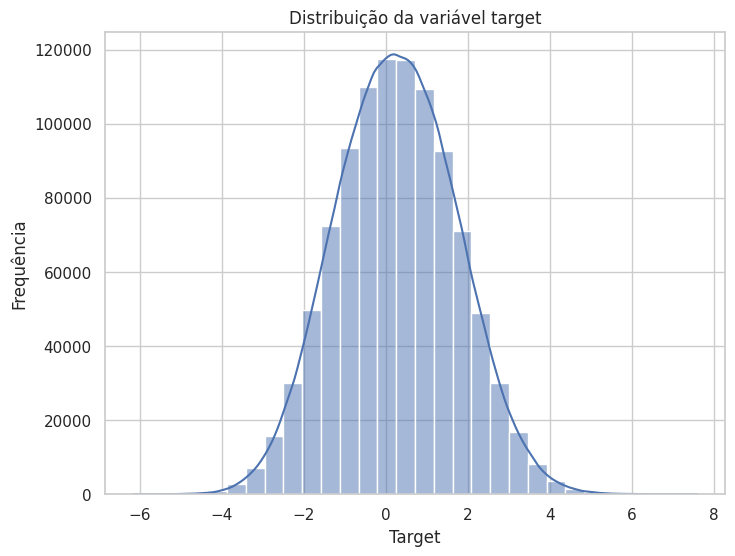

In [9]:
# Distribuição da variável target
plt.figure(figsize=(8,6))
sns.histplot(df_n['target'], kde=True, bins=30)
plt.title("Distribuição da variável target")
plt.xlabel("Target")
plt.ylabel("Frequência")
plt.show()

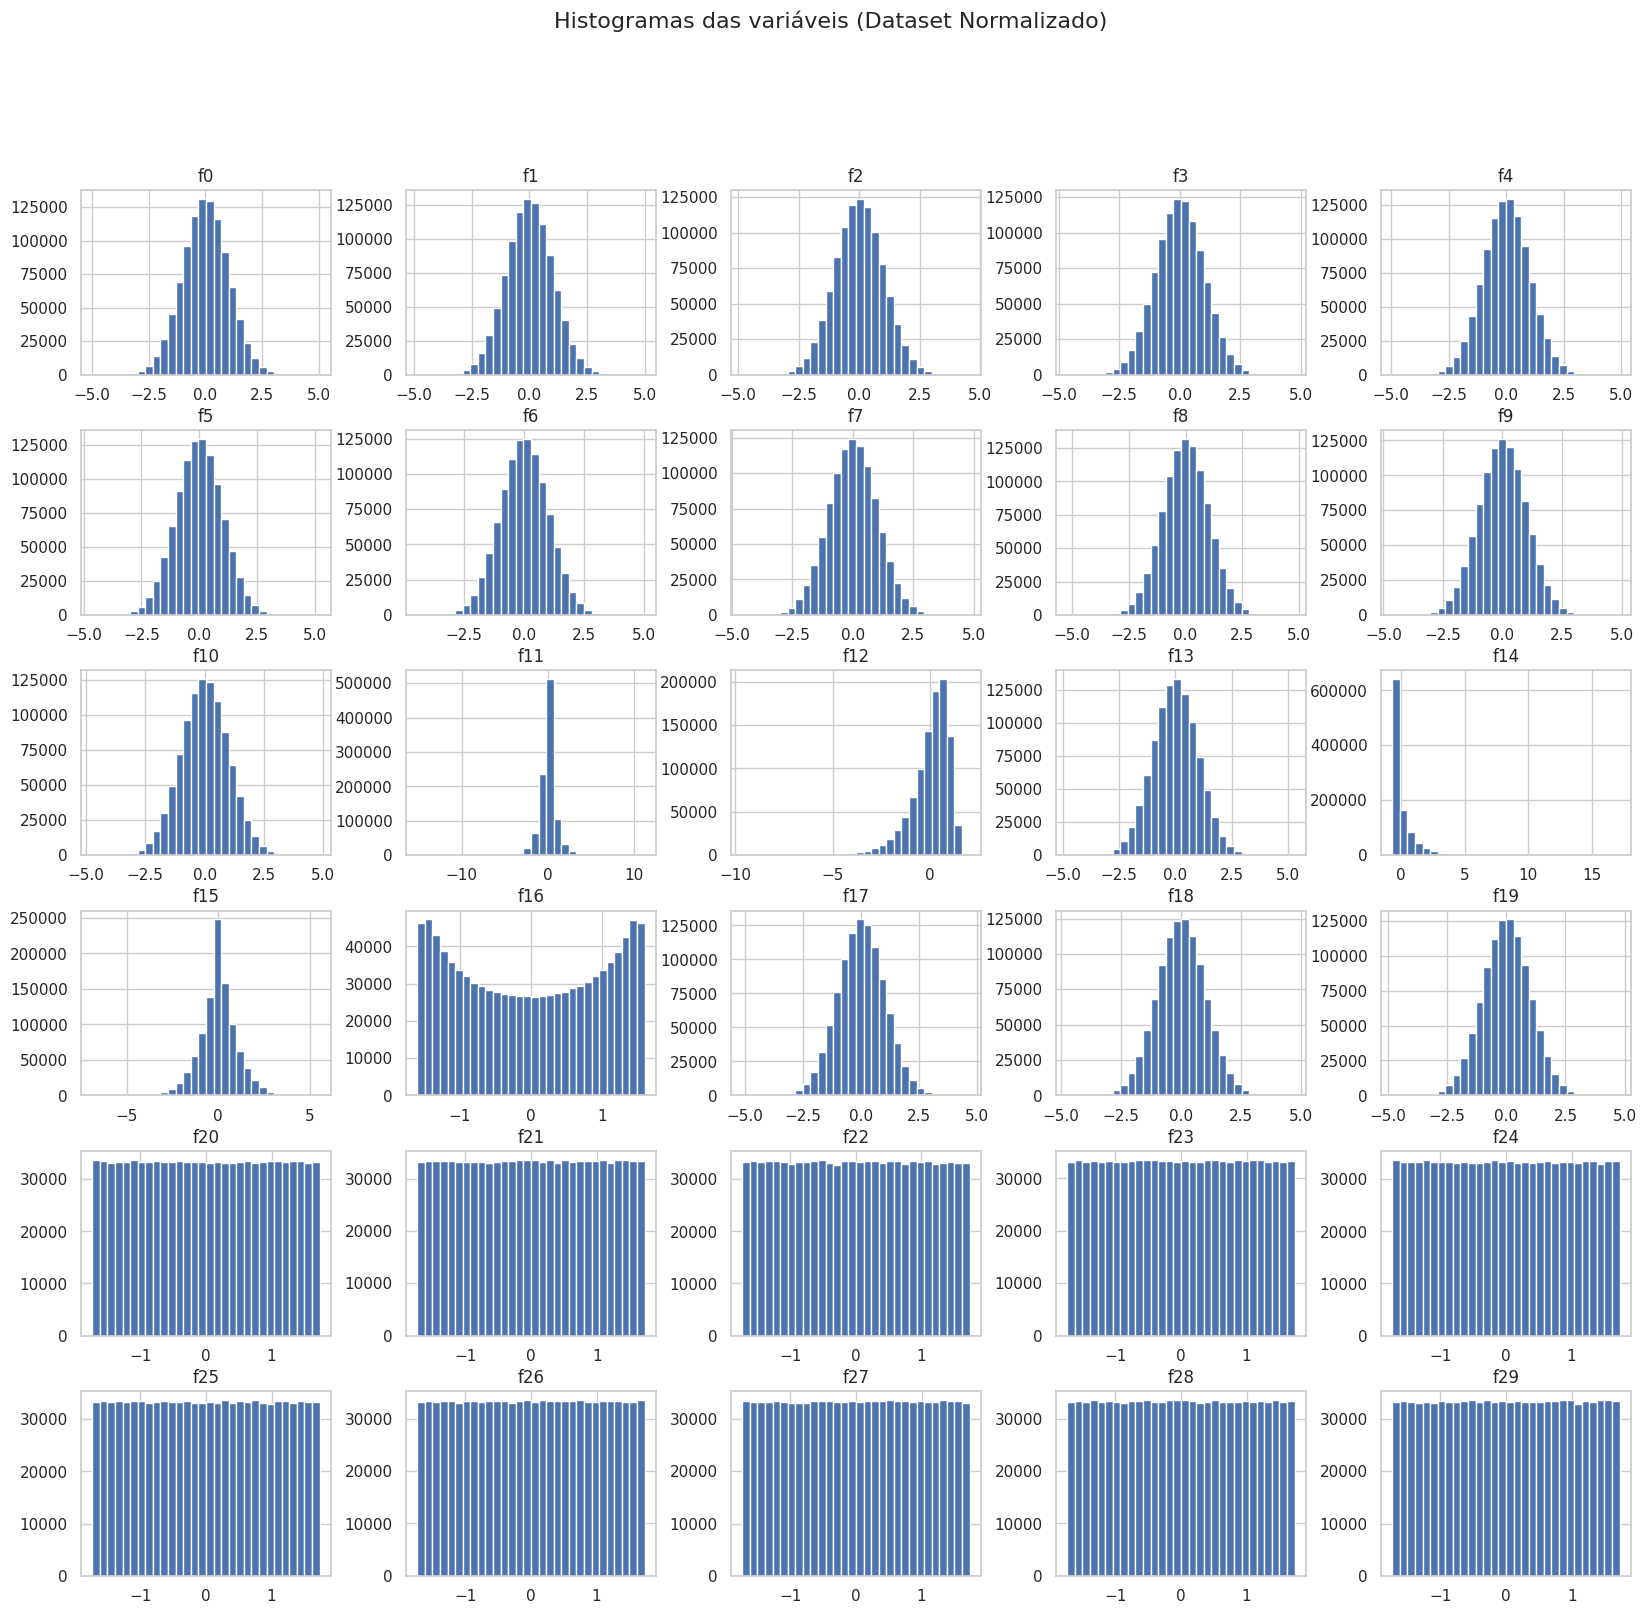

In [10]:
df_n.drop('target', axis=1).hist(bins=30, figsize=(20,18))
plt.suptitle("Histogramas das variáveis (Dataset Normalizado)", fontsize=16)
plt.show()


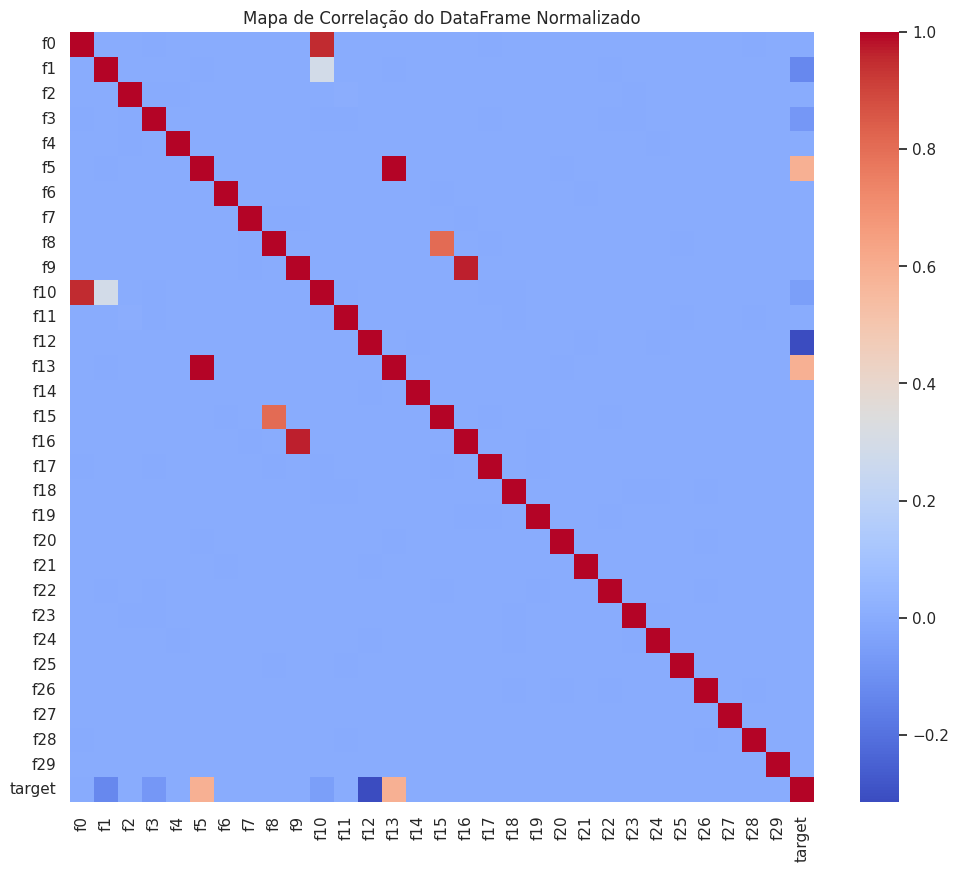

In [11]:
# Mapa de correlação
plt.figure(figsize=(12,10))
corr_matrix = df_n.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Mapa de Correlação do DataFrame Normalizado")
plt.show()

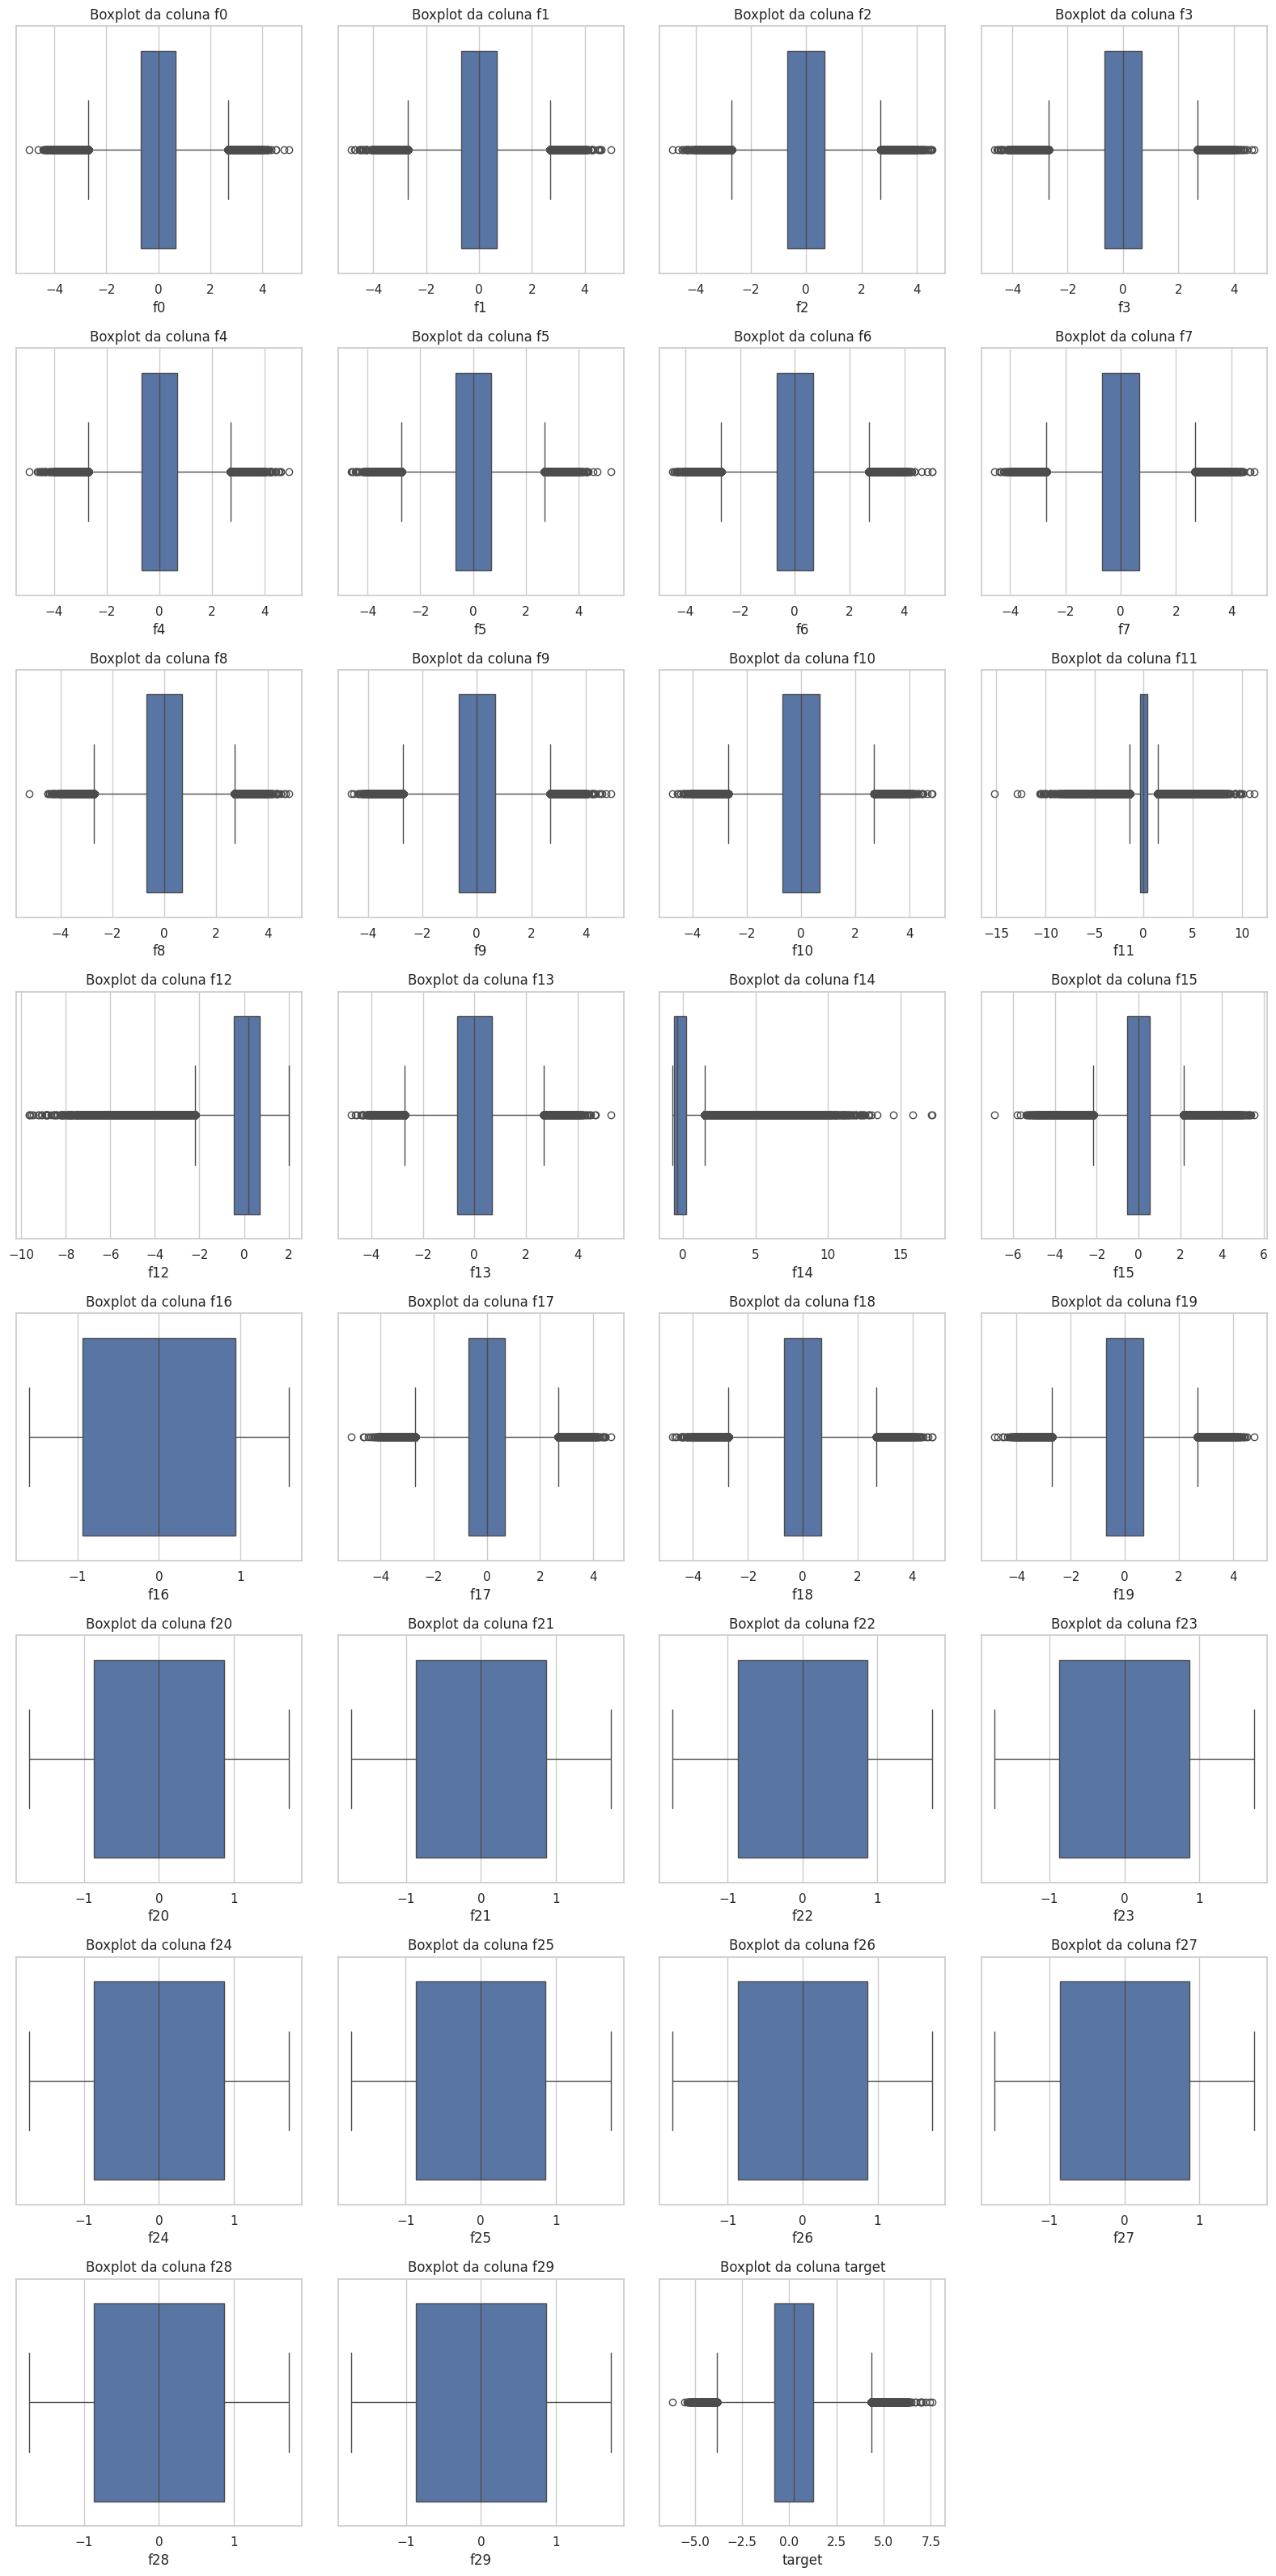

In [12]:
# Define grid dimensions
n_cols = 4
n_rows = int(np.ceil(len(df_n.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(df_n.columns):
  sns.boxplot(x=df_n[col], ax=axes[i])
  axes[i].set_title(f"Boxplot da coluna {col}")

# Hide unused subplots
for j in range(i+1, len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()


## Desenvolvimento de modelos base

In [13]:
# Dividir os dados em conjuntos de treino e teste utilizando os 150 mil primeiros elementos para treino
X = features_normalized
y = target
n_train = 150000
X_train = X.iloc[:n_train]
X_test = X.iloc[n_train:]
y_train = y.iloc[:n_train]
y_test = y.iloc[n_train:]

In [ ]:
# --- Modelos base ---
models_base = {
  'LinearRegression': LinearRegression(),
  'SVR': SVR(),
  'KNN': KNeighborsRegressor()
}

base_results = {}
for name, model in models_base.items():
  t0 = time.time()
  model.fit(X_train, y_train)
  train_time = time.time() - t0

  t0 = time.time()
  y_pred = model.predict(X_test)
  pred_time = time.time() - t0

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  base_results[name] = {
    'rmse': rmse,
    'mae': mae,
    'r2': r2,
    'mape': mape,
    'train_time': train_time,
    'pred_time': pred_time
  }
  print(f"Base: {name} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f} | MAPE: {mape:.2f}%")

Base: LinearRegression | RMSE: 1.0637 | MAE: 0.8423 | R2: 0.4737 | MAPE: 388.07%


In [ ]:
# --- Ensembles ---
ensembles_results = {}

# 1. Ensemble baseado em bagging: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
t0 = time.time()
rf.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred_rf = rf.predict(X_test)
pred_time = time.time() - t0

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

ensembles_results['RandomForest'] = {
  'rmse': rmse_rf,
  'mae': mae_rf,
  'r2': r2_rf,
  'mape': mape_rf,
  'train_time': train_time,
  'pred_time': pred_time,
  'model': rf
}
print(f"Ensemble - RandomForest | RMSE: {rmse_rf:.4f} | MAE: {mae_rf:.4f} | R2: {r2_rf:.4f} | MAPE: {mape_rf:.2f}%")

Ensemble - RandomForest | RMSE: 1.0188 | MAE: 0.8121 | R2: 0.5173 | MAPE: 439.39%


In [ ]:
# 2. Ensemble baseado em boosting: Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
t0 = time.time()
gb.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred_gb = gb.predict(X_test)
pred_time = time.time() - t0

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mape_gb = np.mean(np.abs((y_test - y_pred_gb) / y_test)) * 100

ensembles_results['GradientBoosting'] = {
  'rmse': rmse_gb,
  'mae': mae_gb,
  'r2': r2_gb,
  'mape': mape_gb,
  'train_time': train_time,
  'pred_time': pred_time,
  'model': gb
}
print(f"Ensemble - GradientBoosting | RMSE: {rmse_gb:.4f} | MAE: {mae_gb:.4f} | R2: {r2_gb:.4f} | MAPE: {mape_gb:.2f}%")

Ensemble - GradientBoosting | RMSE: 1.0036 | MAE: 0.8001 | R2: 0.5316 | MAPE: 424.77%


In [ ]:
# 3. Ensemble customizado: média simples dos base learners
preds = [model.predict(X_test) for model in models_base.values()]
y_pred_custom = np.mean(preds, axis=0)
rmse_custom = np.sqrt(mean_squared_error(y_test, y_pred_custom))
mae_custom = mean_absolute_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)
mape_custom = np.mean(np.abs((y_test - y_pred_custom) / y_test)) * 100

# Tempo de predição médio dos base learners
avg_pred_time = np.mean([base_results[m]['pred_time'] for m in base_results])
ensembles_results['CustomEnsemble'] = {
  'rmse': rmse_custom,
  'mae': mae_custom,
  'r2': r2_custom,
  'mape': mape_custom,
  'pred_time': avg_pred_time
}
print(f"Ensemble - Custom (Média) | RMSE: {rmse_custom:.4f} | MAE: {mae_custom:.4f} | R2: {r2_custom:.4f} | MAPE: {mape_custom:.2f}%")

Ensemble - Custom (Média) | RMSE: 1.0494 | MAE: 0.8361 | R2: 0.4879 | MAPE: 377.49%


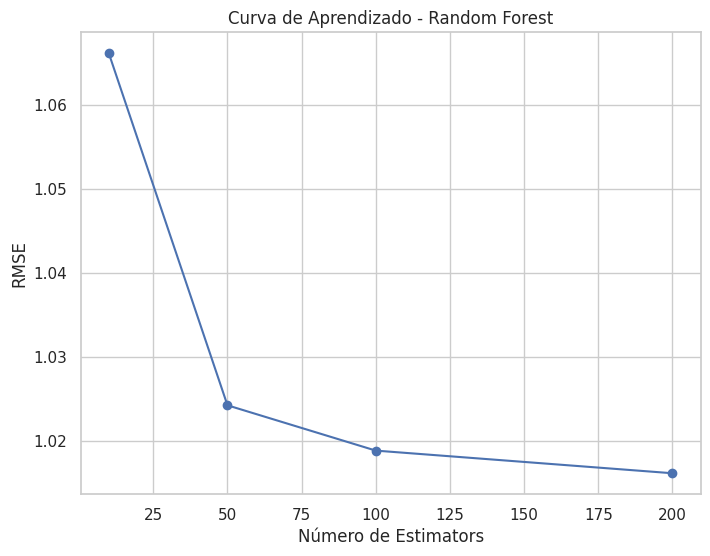

In [ ]:
# --- Curva de aprendizado: variando o número de estimadores para Random Forest ---
estimators_range = [10, 50, 100, 200]
rf_rmse_curve = []

for n in estimators_range:
  model = RandomForestRegressor(n_estimators=n, random_state=42)
  model.fit(X_train, y_train)
  y_pred_temp = model.predict(X_test)
  rmse_temp = np.sqrt(mean_squared_error(y_test, y_pred_temp))
  rf_rmse_curve.append(rmse_temp)

plt.figure(figsize=(8, 6))
plt.plot(estimators_range, rf_rmse_curve, marker='o')
plt.xlabel("Número de Estimators")
plt.ylabel("RMSE")
plt.title("Curva de Aprendizado - Random Forest")
plt.show()

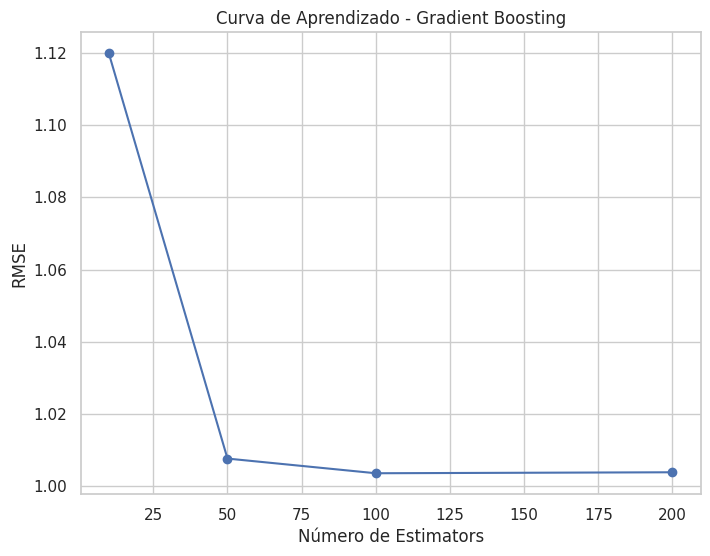

In [ ]:
rmse_gb_curve = []

for n in estimators_range:
  gb_temp = GradientBoostingRegressor(n_estimators=n, random_state=42)
  gb_temp.fit(X_train, y_train)
  y_pred_temp = gb_temp.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred_temp))
  rmse_gb_curve.append(rmse)

plt.figure(figsize=(8, 6))
plt.plot(estimators_range, rmse_gb_curve, marker='o')
plt.xlabel("Número de Estimators")
plt.ylabel("RMSE")
plt.title("Curva de Aprendizado - Gradient Boosting")
plt.show()

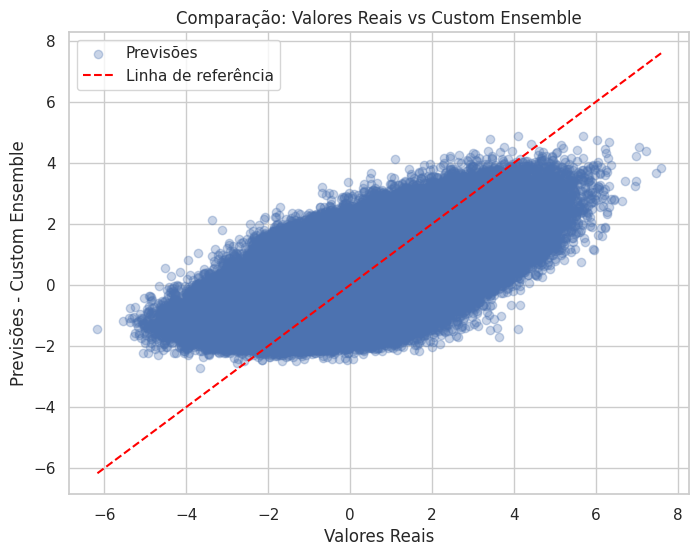

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_custom, alpha=0.3, label="Previsões")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Linha de referência")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões - Custom Ensemble")
plt.title("Comparação: Valores Reais vs Custom Ensemble")
plt.legend()
plt.show()

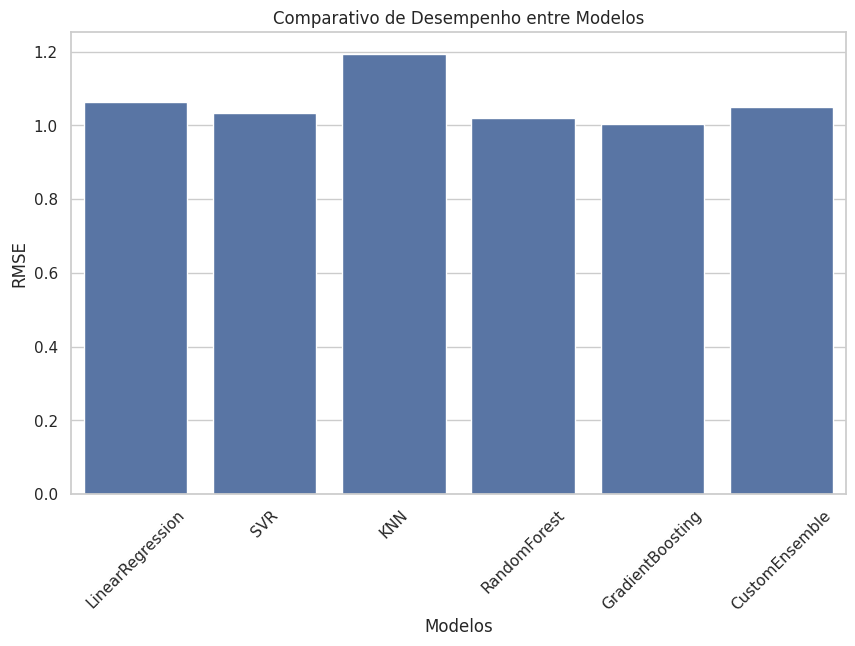

In [ ]:
# --- Comparativo de desempenho entre modelos ---
model_names = list(base_results.keys()) + list(ensembles_results.keys())
rmse_values = [base_results[m]['rmse'] for m in base_results] + [ensembles_results[m]['rmse'] for m in ensembles_results]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=rmse_values)
plt.xlabel("Modelos")
plt.ylabel("RMSE")
plt.title("Comparativo de Desempenho entre Modelos")
plt.xticks(rotation=45)
plt.show()

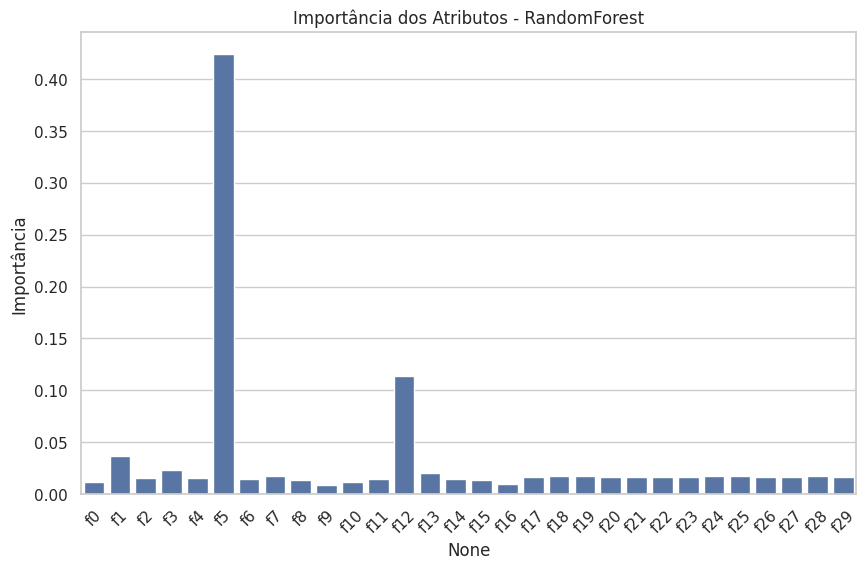

In [ ]:
# --- Importância dos atributos (Feature Importance) para ensembles com essa métrica ---
# Para RandomForest
rf_importance = ensembles_results['RandomForest']['model'].feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns, y=rf_importance)
plt.xticks(rotation=45)
plt.ylabel("Importância")
plt.title("Importância dos Atributos - RandomForest")
plt.show()



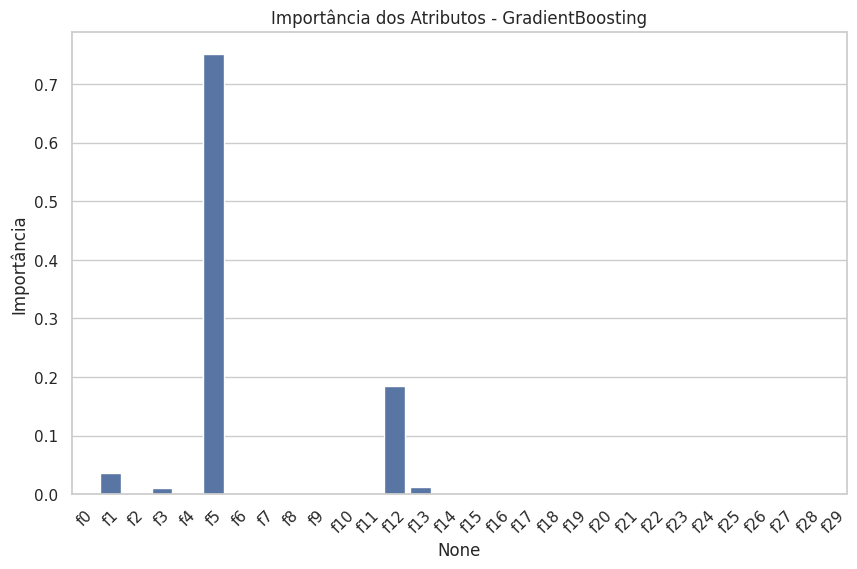

In [ ]:
# Para GradientBoosting
gb_importance = ensembles_results['GradientBoosting']['model'].feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns, y=gb_importance)
plt.xticks(rotation=45)
plt.ylabel("Importância")
plt.title("Importância dos Atributos - GradientBoosting")
plt.show()

In [ ]:
# Combinar os resultados dos modelos base e ensembles
all_results = {}
all_results.update(base_results)
all_results.update(ensembles_results)

# Converter o dicionário em um DataFrame
results_df = pd.DataFrame.from_dict(all_results, orient='index')

# Gerar arquivo CSV com os resultados das métricas
results_df.to_csv('resultados_metricas.csv', index=True)

print("Arquivo CSV gerado com sucesso: resultados_metricas.csv")

Arquivo CSV gerado com sucesso: resultados_metricas.csv
